<div class="alert alert-info text-left">
<center> <h1>Trabajo Práctico de Laboratorio 1: Diseño y Construcción de un Filtro NOTCH </h1></center>
<h3> Teoría de circuitos 2 </h3>
<img src="./rsc/logo_UTN.svg" align="right" width="150" />     
<h3> Facundo N. Iglesias </h3>
<h3> 2023 </h3>
</div>

<center><h1> INDICE </h1></center>

1. [INTRODUCCIÓN](#id1)
    - [1.1 Librerias](#id1.1)
    - [1.2 Objetivo](#id1.2)
<br><br>
2. [DISEÑO DEL FILTRO](#id2)
    - [2.1 Parámetros del filtro](#id2.1)
    - [2.2 Simulación simbólica](#id2.2)
    - [2.3 Cálculo de los componentes](#id2.3)
<br><br>
3. [SIMULACIÓN CIRCUITAL](#id3)
<br><br>
4. [CONSTRUCCIÓN DEL FILTRO](#id4)
<br><br>
4. [PRUEBAS DE LABORATORIO](#id5)
    - [5.1 Resultados obtenidos](#id5.1)
    - [5.2 Gráfico de Módulo](#id5.2)
    - [5.3 Gráfico de Fase](#id5.3)
<br><br>
6. [APENDICE](#id6)
    - [6.1 Código de la función para plotear archivo](#id6.1)
    - [6.2 Código de la función para plotear vector](#id6.2)
    - [6.3 Especificaciones técnicas](#id6.3)

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id1">
        <h1>1 INTRODUCCIÓN</h1>
    </a>    
</center>

<a name="id1.1">
    <h3>1.1 Librerias de Python empleadas</h3>
</a>   

In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import IFrame
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import Chebyshev_polynomials
from pytc2.sistemas_lineales import TransferFunction as tf

<a name="id1.2">
    <h3>1.2 Objetivo</h3>
</a>   

El siguiente desarrollo se realiza con la finalidad de diseñar un filtro Notch que cumpla con las siguientes caracteristicas impuestas:
<img src="./rsc/consigna.png" align="center" width="800" height="400" /> 

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id2">
        <h1>2 DISEÑO DEL FILTRO</h1>
    </a>    
</center>

<a name="id2.1">
    <h3>2.1 Parámetros carácteristicos del filtro</h3>
</a>   
 
A continuación se expresa la función transferencia que corresponde con un filtro Notch y a partir de ella se definen los parámetros característicos que permiten configurar, ajustar y sintonizar el filtro.

Función transferencia:
\begin{equation}
T(s) = \frac{s²+\omega_0}{s²+s\frac{\omega_0}{Q}+\omega_0²}
\end{equation}

Frecuencia de Notch:
\begin{equation}
f_0 = \sqrt{f_1f_2}
\end{equation}

Factor de calidad:
\begin{equation}
Q = \frac{\omega_0}{B\sqrt{q²-1}}
\end{equation}

Siendo
\begin{equation}
q=10^{\frac{\alpha_{max}}{20}}
\end{equation}


Según las condiciones de diseño:

La frecuencia de Notch debe ser:
\begin{equation}
f_0 = 50Hz
\end{equation}

El ancho de banda:
\begin{equation}
B = 10 Hz
\end{equation}

Y el riple máximo permitido en la banda de paso:
\begin{equation}
\alpha_{max} = 3dB
\end{equation}

\begin{equation}
\alpha_{max} = 3dB \rightarrow q= \sqrt{2} \rightarrow Q =\frac{\omega_0}{\omega_2-\omega_1} = \frac{f_0}{f_2-f_1}
\end{equation}

 

<a name="id2.2">
    <h3>2.2 Simulación simbólica</h3>
</a>   
Realizamos a continuación una primera simulación para obtener la respuesta de modulo y fase del filtro, con el fin de visualizar previamente el objetivo al cual queremos llegar. Para ello recurrimos la herramienta Analyse_sys de la librería de la catedra. 

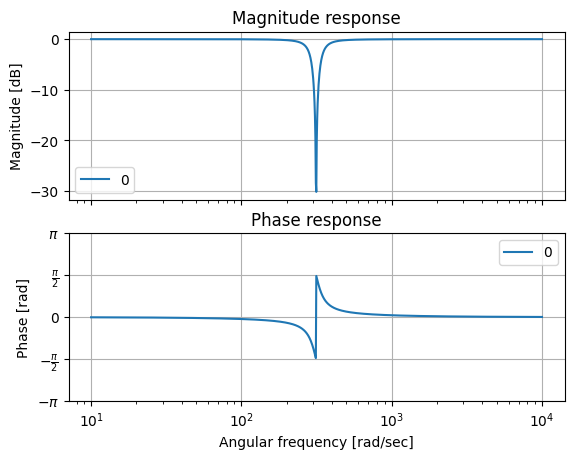

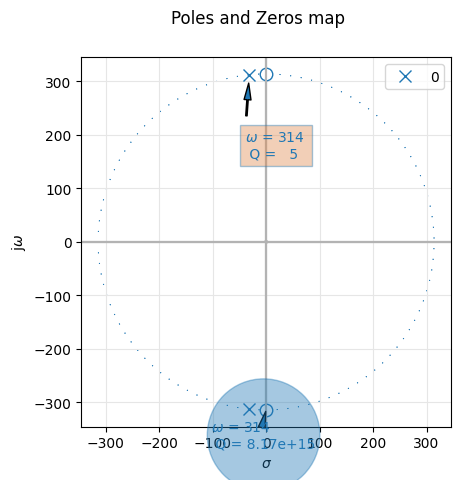

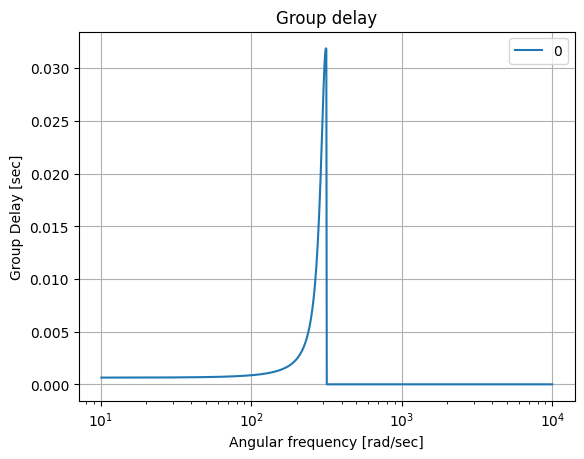

In [6]:
#Parámetros del filtro
f_o = 50
b = 10
w_o = 2*np.pi*f_o
q = f_o/10
#Simulación simbólica
num_notch = [1, 0, (w_o**2)]
den_notch = [1, (w_o/q), (w_o**2)]
tf(num_notch, den_notch)
analyze_sys(tf(num_notch, den_notch))

<a name="id2.3">
    <h3>2.3 Cálculo de los componentes</h3>
</a>   

De la hoja de datos del UAF42 obtuvimos el siguiente circuito, en el cual se puede observar los valores fijos de los componentes internos del circuito integrado y los componentes externos, que nos brindan los grados de libertad para ajustar los parámetros del filtro que se definieron en la sección anterior. 
<img src="./rsc/circuito_dattasheet.png" align="center" width="600" height="400" /> 

A partir de las ecuaciones de diseño obtenemos la relación entre los componentes y los parámetros:

Frecuencia central del filtro:
\begin{equation}
f_0 = \frac{1}{2\pi R_fC} \rightarrow R_f = \frac{1}{2\pi f_0C}
\end{equation}

Ancho de banda:
\begin{equation}
B = \frac{f_0}{Q} 
\end{equation}

Factor de calidad:
\begin{equation}
Q = \frac{R_{Z3}}{R_{Z1}} = \frac{R_{Z3}}{R_{Z2}} \rightarrow R_{Z1} = R_{Z2}
\end{equation}

\begin{equation}
R_Q = \frac{25K}{Q-1}
\end{equation}

\begin{equation}
R_{F1} = R_{F2} = R_F 
\end{equation}

\begin{equation}
C_1 = C_2 = C = 1000 pF 
\end{equation}

Siendo Q=5, B=10 y f0 = 50Hz

Luego obtenemos los valores de los componentes adoptando:
\begin{equation}
R_{Z3} = 10 K\Omega
\end{equation}

\begin{equation}
R_{Z1} = R_{Z2} = \frac{R_{Z3}}{Q} = \frac{10k\Omega}{5} = \boxed{2K\Omega}
\end{equation}

\begin{equation}
R_Q = \frac{25K\Omega}{Q-1} = \frac{25K\Omega}{4} \rightarrow \boxed{R_Q = 6250\Omega}
\end{equation}

\begin{equation}
R_F = \frac{1}{2\pi f_0C} \rightarrow \boxed{R_F = 3,1830M\Omega}
\end{equation}



<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id3">
        <h1>3 SIMULACIÓN CIRCUITAL</h1>
    </a>    
</center>

Ahora que disponemos de los valores de los componentes, podemos proceder a realizar una simulación del circuito y 
verificar que los resultados sean los esperados, para ello utilizamos el software LtSpice.

<img src="./rsc/circuito_simulado.png" align="center" width="600" height="400" /> 



Primero ubicamos con los cursores la frecuencia de Notch en ambos gráficos:
<img src="./rsc/sim1.png" align="center" width="1000" height="1000" /> 
Se observa en el gráfico de módulo que la respuesta posee maxima planicidad en la banda de paso y que la frecuencia central del filtro es de 50Hz.

En segundo lugar medimos el ancho de banda para ver si corresponde con el calculado:
<img src="./rsc/sim2.png" align="center" width="1000" height="1000" /> 
Se verifica el ancho de banda de 10 Hz cuando el modulo cae 3dB en la banda de paso por ambos laterales de la frecuencia de Notch, cumpliendo con la consigna (10Hz).

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id4">
        <h1>4 CONSTRUCCIÓN DEL FILTRO</h1>
    </a>    
</center>

El circuito impreso se diseñó con el software Kicad y los archivos se encuentran disponibles en este repositorio en la carpeta "diseñoPlaca".
<img src="./rsc/circuitoImpreso.png" align="center" width="600" height="400" /> 

Prototipo realizado en protoboard:
<img src="./rsc/prototipo.png" align="center" width="600" height="400" /> 

Circuito armado en placa:
<img src="./rsc/circuitoArmado.png" align="center" width="600" height="400" /> 


<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id5">
        <h1>5 PRUEBAS DE LABORATORIO</h1>
    </a>    
</center>

<a name="id5.1">
    <h3>5.1 Resultados obtenidos</h3>
</a>   

El circuito se probó con una señal de entrada senoidal de 10 Vpp

|Vin_rms[V]|Vin_vpp[V]|Vout_rms [V]|Vout_vpp[V]|F[Hz]|delta| Fase|
|:----|:----|:----|:----|:----|:----|:----|
|3,3|9,35|3,4|9,68|10|0,05|180|
|3,48|9,70|3,37|9,62|40|0,0098|141,12|
|3,69|10,22|3,35|9,55|42|0,0092|139,104|
|3,18|8,57|2,5|7,11|44|0,0086|136,224|
|3,29|9,25|2,42|6,71|45|0,0084|136,08|
|3,45|9,66|0,106|0,24|50|0,0074|133,2|
|3,41|9,59|2,58|7,42|55|0,0068|134,64|
|3,28|9,43|3,05|8,57|60|0,007|151,2|
|3,6|10,11|3,31|9,19|100|0,005|180|
|3,73|10,48|3,72|10,47|1000|0,005|180|

In [100]:
f  = '10 40 42 44 45 50 55 60 100 1000'.replace(',','.').split(' ')
vin  = '3,3 3,48 3,69 3,18 3,29 3,45 3,41 3,28 3,6 3,73'.replace(',','.').split(' ')
vout = '3,4 3,37 3,35 2,5 2,42 0,106 2,58 3,05 3,31 3,72'.replace(',','.').split(' ')
delta = '0,05 0,0098 0,0092 0,0086 0,0084 0,0074 0,0068 0,007 0,005 0,005'.replace(',','.').split(' ')
vin = [float(n) for n in vin]
vout = [float(n) for n in vout]
f = [float(n) for n in f]
delta = [float(n) for n in delta]

<a name="id5.2">
    <h3>5.2 Gráfico de módulo</h3>
</a>   

Calculamos el modulo como:
\begin{equation}
|T| = 20 log(\frac{V_{out}}{V_{in}})\space\space dBr
\end{equation}

In [129]:
dbr = list()
for par in zip(vin, vout): 
    dbr.append(20*np.log10(par[1]/par[0]))

Empleando la función que implementamos para plotear los datos:

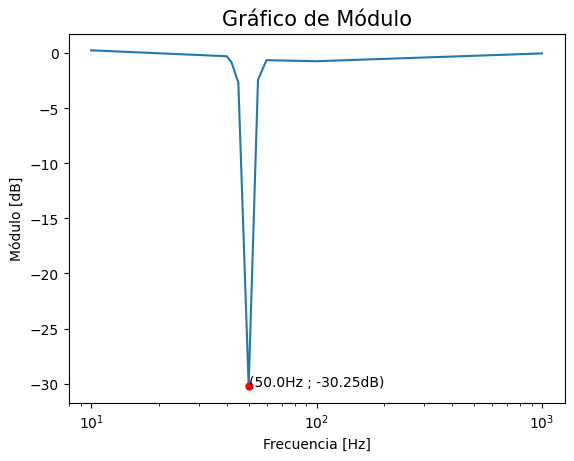

In [130]:
plotVector([f,dbr],["Gráfico de Módulo","Frecuencia [Hz]","Módulo [dB]"],[f[5],dbr[5],"({}Hz ; {:,.2f}dB)".format(f[5],dbr[5])])

<a name="id5.3">
    <h3>5.3 Gráfico de Fase</h3>
</a>   

La columna delta de la tabla corresponde con el desfasaje medido a partir de la diferencia temporal entre los picos de la señal de entrada y la de salida. Por lo tanto, la expresión para calcular la fase es la siguiente:
\begin{equation}
\varphi = Frecuencia * 360 * delta
\end{equation}

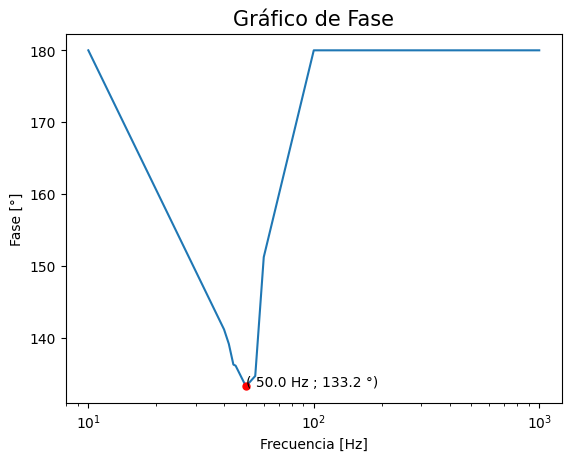

In [114]:
fase = list()
for par in zip(f, delta): 
    fase.append(par[0]*par[1]*360)
fase[-1] = 180.0
y = fase
x = f
plotVector([x,y],["Gráfico de Fase","Frecuencia [Hz]","Fase [°]"],[x[5],y[5],"( {} Hz ; {} °)".format(x[5],y[5])])

<a name="id5.4">
    <h3>5.4 Algunas imagenes de la experiencia</h3>
</a>   

<img src="./lab/lab1.jpg" align="center" width="400" height="600" /> 
<center> Señal de entrada de 10vpp en 10Hz </center>

<img src="./lab/lab2.jpg" align="center" width="400" height="600" /> 
<center> Visualización de Vin y Vout a 10Hz </center>


<img src="./lab/lab3.jpg" align="center" width="400" height="600" /> 
<center> Visualización de Vin y Vout a 1kHz </center>


En las imagenes anteriores se pone en evidencia la diferencia de fase de 180° entre las señales de entrada y salida.

<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
<a name="id6">
        <h1>6 APENDICE</h1>
    </a>    
</center>

<a name="id6.1">
    <h3>6.1 Código de la función para plotear desde archivo</h3>
</a>   

In [11]:
#Función para gráficar módulo y fase a partir de vectores de datos.
#Parámetros de entrada:
#path_modulo = Ruta del archivo csv que contiene los datos registrados del modulo.
#path_fase = Ruta del archivo csv que contiene los datos registrados de la fase.
#Parámetros devueltos: None.
def plotFromCSV(path_fase,path_modulo):
    header = 105    
    #Dataframes
    df_fase = pd.read_csv(path_fase,header=header)
    df_modulo = pd.read_csv(path_modulo,header=header)
    df_modulo['Freclog'] = df_modulo['X (Hz)'].map(lambda x: x/1000)   
    df_fase['Freclog'] = df_fase['X (Hz)'].map(lambda x: x/1000)   
    x_mod = df_modulo['Freclog']
    y_mod = df_modulo['Ch-1 (dBr)']
    x_fase = df_fase['Freclog']
    y_fase = df_fase['Ch-1 (deg)']
    #Gráfico de módulo
    plotVector([x_mod,y_mod],["Gráfico de Módulo","Frecuencia [kHz]","Módulo [dB]"],[1.73,-2.4,"(1,7 ; -2,4)"])
    #Gráfico de fase
    plotVector([x_fase,y_fase],["Gráfico de Fase","Frecuencia [kHz]","Fase [°]"],[1.79,13.17,"(1,8 ; 13,2)"])

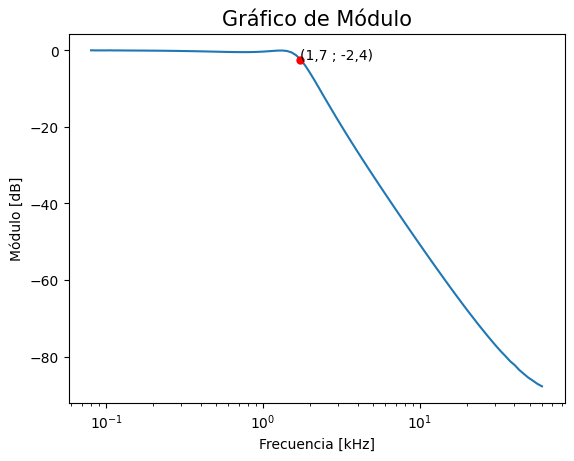

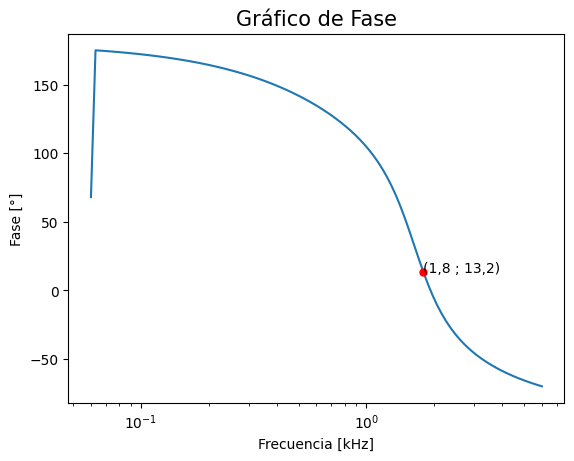

In [16]:
plotFromCSV('./rsc/fase.csv','./rsc/modulo.csv')

<a name="id6.2">
    <h3>6.2 Código de la función para plotear vector de datos</h3>
</a>   

In [49]:
#Función para plotear vectores de datos.
#Parámetros:
# vector: Valores de x e y.
# labels: Lista de 3 datos de tipo string: Titulo, magnitud de eje x y magnitud de eje y.
# mark: Lista de 3 datos, dos floats y una string: Coordenada x, y coordenada y descripción del punto.
def plotVector(vector,labels,mark):
    fig, ax = plt.subplots()
    ax.plot(vector[0],vector[1])
    plt.semilogx()
    plt.title(labels[0],fontsize=15)
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    plt.annotate(mark[2], mark[:2])
    plt.plot(mark[0], mark[1], 'o', color='red', ms=5)
    plt.show()

<a name="id6.3">
    <h3>6.3 Especificaciones técnicas</h3>
</a>   

#### Nota de aplicación "Diseño de un filtro Notch sintonizado a 60Hz"

In [3]:
IFrame("./rsc/nota_aplicacion.pdf", width=1000, height=1000)

#### Hoja de datos de Texas Instruments

In [4]:
IFrame("./rsc/dattasheet.PDF", width=1000, height=1000)

#### Identificación del instrumental utilizado para las mediciones en el laboratorio

* Fuentes de tensión: NG1351

* Osciloscopio digital: NG1853

* Generador de señales: NG1909

--------------------------------------------------------------------------------------------------------------------